In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import (manifold, datasets)
from sklearn.manifold import LocallyLinearEmbedding

In [116]:
#PART 1

In [117]:
test_x = pd.read_csv('/Users/shubhambhatt/Desktop/DS1stsem/idl/data AS1/data/test_in.csv', header= None)
test_y = pd.read_csv('/Users/shubhambhatt/Desktop/DS1stsem/idl/data AS1/data/test_out.csv', header= None)
train_x = pd.read_csv('/Users/shubhambhatt/Desktop/DS1stsem/idl/data AS1/data/train_in.csv', header= None)
train_y = pd.read_csv('/Users/shubhambhatt/Desktop/DS1stsem/idl/data AS1/data/train_out.csv', header= None)

In [118]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [119]:
train_y.tail()

,0
1702,8
1703,9
1704,7
1705,9
1706,8


In [120]:
train_x['output'] = train_y[0]

In [121]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,output
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,3


In [122]:
train_x.drop('output', axis=1).apply(lambda x: x.mean(), axis=1)

0      -0.317816
1      -0.111738
2      -0.537996
3      -0.599449
4      -0.416129
          ...   
1702   -0.541695
1703   -0.619824
1704   -0.712820
1705   -0.441340
1706   -0.330387
Length: 1707, dtype: float64

In [123]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,output
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,3


In [124]:
centers = train_x.groupby(['output']).mean()
print(centers)

             0         1         2         3         4         5         6    \
output                                                                         
0      -1.000000 -0.997524 -0.987003 -0.945918 -0.844044 -0.604991 -0.141621   
1      -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -0.996972 -0.661611   
2      -0.986797 -0.941292 -0.876579 -0.804203 -0.629980 -0.406213 -0.242248   
3      -1.000000 -0.989557 -0.917977 -0.728794 -0.378145 -0.045748  0.235366   
4      -1.000000 -1.000000 -1.000000 -0.984016 -0.910434 -0.855426 -0.918049   
5      -1.000000 -0.994852 -0.980898 -0.931909 -0.840636 -0.775227 -0.623273   
6      -1.000000 -1.000000 -1.000000 -1.000000 -0.997404 -0.964040 -0.875828   
7      -0.985030 -0.900476 -0.777145 -0.619380 -0.434488 -0.279331 -0.208434   
8      -0.999285 -0.974076 -0.917743 -0.822118 -0.617340 -0.278667  0.177389   
9      -1.000000 -1.000000 -1.000000 -0.995712 -0.963902 -0.791992 -0.336841   

             7         8         9    .

In [125]:
dst = []
for i in centers.index:
    dst_aux=[]
    for j in centers.index:
        dst_aux.append(distance.euclidean(centers.iloc[i], centers.iloc[j]))
    dst.append(dst_aux)
dst

[[0.0,
  14.44960796590658,
  9.334555870229643,
  9.143733671882783,
  10.769844437633486,
  7.519296259597183,
  8.154443125778972,
  11.864555054634078,
  9.907901737320392,
  11.488874937417041],
 [14.44960796590658,
  0.0,
  10.12532257709667,
  11.733232901831071,
  10.173786431281785,
  11.118800407467436,
  10.614700366283566,
  10.743153673524732,
  10.086776773038181,
  9.932093699343714],
 [9.334555870229643,
  10.12532257709667,
  0.0,
  8.178284885647821,
  7.932541482770051,
  7.906796320949824,
  7.33180753932081,
  8.872531069307183,
  7.077516177863561,
  8.887747852000189],
 [9.143733671882783,
  11.733232901831071,
  8.178284885647821,
  0.0,
  9.087607799539475,
  6.118750020921419,
  9.302064730092098,
  8.922400934698304,
  7.020424894700361,
  8.354350120111869],
 [10.769844437633486,
  10.173786431281785,
  7.932541482770051,
  9.087607799539475,
  0.0,
  8.001517414291124,
  8.78223264756089,
  7.583012282564445,
  7.380908991053923,
  6.0104079308959975],
 [7.

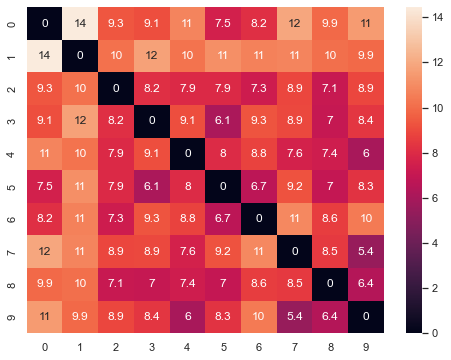

In [126]:
sns.heatmap(dst, annot = True)
sns.set(rc={'figure.figsize':(8,6)})

In [127]:
#PART 2

In [128]:
pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(train_x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


(1707, 2)

Text(0, 0.5, 'Principal Component 2')

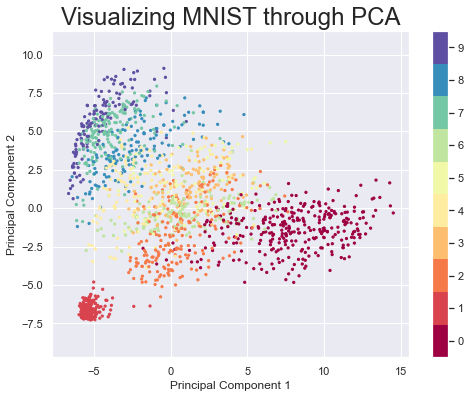

In [129]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=train_y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


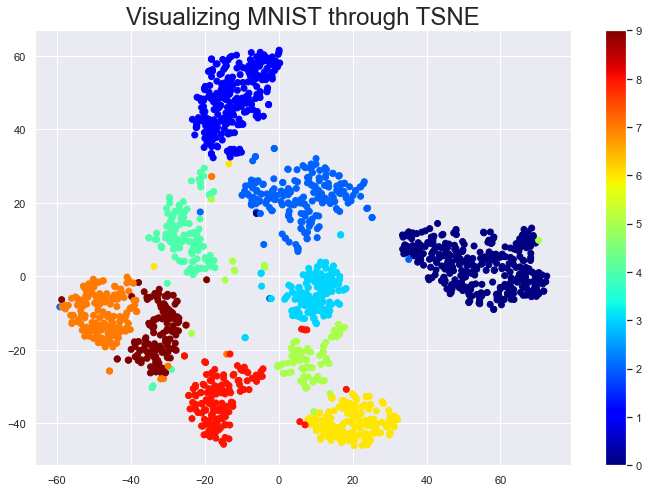

In [130]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 42)
X_reduced = tsne.fit_transform(train_x)


plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = train_y, cmap='jet')
plt.title('Visualizing MNIST through TSNE', fontsize=24);
plt.colorbar()
plt.axis()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


train:  (1707, 257) (1707, 10)


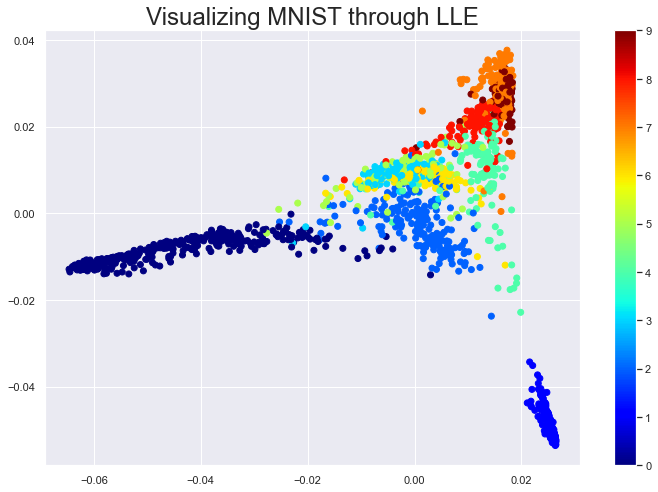

In [131]:
embedding = LocallyLinearEmbedding(n_neighbors=15, n_components=10, method='modified', eigen_solver='dense')
embedding.fit(train_x)
X_train_lle = embedding.transform(train_x)
print('train: ', train_x.shape, X_train_lle.shape)

plt.figure(figsize=(12, 8))
plt.scatter(X_train_lle[:,0], X_train_lle[:,1], c = train_y, cmap='jet')
plt.title('Visualizing MNIST through LLE', fontsize=24);
plt.colorbar()
plt.axis()
plt.show()

In [132]:
# PART 3 

In [198]:
# with knn classifier

from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit(train_x)
preds = km.predict(train_x)

centroids = km.cluster_centers_

from scipy.spatial import distance_matrix
dist_mat = pd.DataFrame(distance_matrix(train_x.values, centroids))

dist_mat.idxmin(axis=1) == preds

dist_mat.groupby(preds).mean()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,9.882227,15.133945,13.107059,12.904597,15.474763,13.537486,14.240108,13.799706,13.099251,13.171159
1,14.730901,9.286464,14.876357,17.637176,18.729556,13.446312,17.985542,18.639374,15.835140,16.109578
2,13.598962,15.649655,10.569008,14.311010,14.962240,14.685614,15.404620,15.088139,13.767413,13.223639
3,12.328576,17.526139,13.294133,9.060064,15.151471,15.427785,12.999454,11.413408,12.700835,12.428760
4,12.667887,16.772525,11.455376,12.870054,3.819591,14.939366,13.946839,12.389971,12.267140,11.042639
5,12.239106,12.539712,13.013447,14.791105,16.412766,7.936063,16.313435,16.247785,12.394406,13.471839
6,13.212050,17.492009,13.997509,12.453814,15.697008,16.485603,8.232858,10.647186,14.107329,12.134111
7,12.269369,17.823046,13.178291,10.293618,13.875836,16.047229,10.110208,7.521572,12.957008,10.973637
8,12.359200,15.538900,12.534749,12.460049,14.489220,12.966367,14.396395,13.719709,8.791722,12.087052
9,13.390788,16.629543,12.913236,13.185863,14.305112,14.865832,13.422439,12.794305,13.069285,10.117406


In [199]:
from scipy.spatial.distance import cdist
dm = cdist(train_x, centroids)
dm.shape

(1707, 10)

In [208]:
min_x = np.argmin(dm, axis=1)
min_x

array([8, 0, 9, ..., 7, 7, 3])

In [209]:
len(min_x)

1707

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y, preds)

#Note- accuracy should be around 80 but i am getting 14

0.13825424721734036

In [ ]:
# PART $

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(dm)
dm.reshape(-1, 1)
NearestNeighbors(n_neighbors=1)
print(neigh.kneighbors([1]))

ValueError: Expected 2D array, got 1D array instead:
array=[1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.